In [2]:
import numpy as np
import pandas

In [161]:
points = pandas.read_table('SoFarinha3Kp.txt', sep=' ', names='xyz', dtype={'x': np.float32, 'y': np.float32, 'z': np.float32})

In [162]:
points

,x,y,z
0,-6.646221,20.149977,-3.579397
1,-6.553488,19.842066,-3.704167
2,-5.740045,19.592062,-3.572523
3,-5.574181,19.695089,-3.443098
4,-5.336629,19.321108,-3.696704
5,-5.771647,19.571400,-3.593774
6,-5.625398,19.676079,-3.484923
7,-5.871430,20.178783,-3.056323
8,-5.567937,20.190393,-2.993254
9,-5.458427,20.062490,-3.159509


In [163]:
box_max = points.max()
box_max

x     8.623216
y    30.918791
z     2.556613
dtype: float32

In [164]:
box_min = points.min()
box_min

x   -11.041434
y    15.607461
z    -6.336133
dtype: float32

In [165]:
delta = points.max() - points.min()

In [166]:
delta

x    19.664650
y    15.311330
z     8.892746
dtype: float32

In [167]:
box_width_proportion = delta.x / 37  # largura em cm

In [168]:
box_depth_proportion = delta.y / 30  # profundidade em cm

In [169]:
box_height_proportion = delta.z / 18  # altura em cm

In [170]:
# maximo volume possível do modelo
max_model_volume = 37 * 30 * 18
max_model_volume

19980

In [171]:
PACKAGE_VOLUME = 16.5 * 17 * 6.5 # em cm3
NUMBER_OF_PACKAGES = 4
total_baseline_volume = PACKAGE_VOLUME * NUMBER_OF_PACKAGES # volume de farinha no modelo
total_baseline_volume

7293.0

In [172]:
box_min.x + box_width_proportion*37

8.6232156753540039

In [173]:
box_min.y + box_depth_proportion*30

30.918790817260742

In [174]:
# constantes para definir o tamanho dos quadrantes
STEPS_WIDTH = 10
STEPS_DEPTH = 10

In [175]:
box_width_step = delta.x / STEPS_WIDTH # STEPS_WIDTH divisões na largura
box_width_step

1.9664649963378906

In [176]:
box_depth_step = delta.y / STEPS_DEPTH # STEPS_DEPTH divisões na profundidade
box_depth_step

1.531132984161377

In [177]:
box_min.x + STEPS_WIDTH*box_width_step # a máxima largura é atingida na última divisão

8.6232156753540039

In [178]:
box_min.y + STEPS_DEPTH*box_depth_step # a máxima profundidade é atingida na última divisão

30.918790817260742

In [179]:
# seleciona pontos dentro do primeiro quadrante (1,1)
points_quadrant_1_1 = points.loc[(points["x"] < (box_min.x+1*box_width_step)) & (points["y"] < (box_min.y+1*box_depth_step))]
points_quadrant_1_1

,x,y,z
56,-9.978073,17.068142,-5.981015
57,-9.815164,16.541557,-6.232831
58,-9.742514,16.735249,-6.042958
61,-9.470703,17.130783,-5.985251
63,-9.479581,16.826414,-6.123676
68,-9.277325,17.090134,-5.995420


In [359]:
# seleciona pontos dentro do último quadrante (10,10)
points_quadrant_10_10 = points.loc[(points["x"] > (box_min.x+9*box_width_step)) & (points["y"] > (box_min.y+9*box_depth_step)) & (points["x"] < (box_min.x+10*box_width_step)) & (points["y"] < (box_min.y+10*box_depth_step))]
points_quadrant_10_10

,x,y,z
3717,7.248293,29.679365,-1.879926
3719,8.174680,29.995333,-2.437111


In [181]:
# seleciona pontos dentro do quadrante (1,10)
points.loc[(points["x"] > (box_min.x+0*box_width_step)) & (points["y"] > (box_min.y+9*box_depth_step)) & (points["x"] < (box_min.x+1*box_width_step)) & (points["y"] < (box_min.y+10*box_depth_step))]

,x,y,z
1352,-9.715121,29.66308,0.758798


In [182]:
# procura max val eixo z
max_z = points.max().z
points.loc[(points["z"] == max_z)]

,x,y,z
1445,-6.753729,29.764936,2.556613


In [183]:
box_min.x+3*box_width_step

-5.1420392990112305

In [184]:
box_min.y+9*box_depth_step

29.387657833099368

In [185]:
# encontra quadrante do max val do eixo z
points.loc[(points["x"] > (box_min.x+3*box_width_step)) & (points["y"] > (box_min.y+8*box_depth_step)) & (points["x"] < (box_min.x+4*box_width_step)) & (points["y"] < (box_min.y+9*box_depth_step))]
# x = quadrante 4
# y = quadrante 9

,x,y,z
1433,-5.108001,28.115459,0.960877
1434,-4.834965,27.967173,0.653204
1435,-5.136930,28.040981,0.938046
3080,-4.533508,28.154243,0.250137
3081,-4.712270,28.712893,0.264411
3085,-4.754160,29.215670,0.219606


In [186]:
# procura min val eixo z
points.loc[(points["z"] == box_min.z)]

,x,y,z
3262,6.755845,17.439482,-6.336133


In [187]:
# encontra quadrante do min val do eixo z
points.loc[(points["x"] > (box_min.x+9*box_width_step)) & (points["y"] > (box_min.y+1*box_depth_step)) & (points["x"] < (box_min.x+10*box_width_step)) & (points["y"] < (box_min.y+2*box_depth_step))]
# x = quadrante 10
# y = quadrante 2

,x,y,z
3262,6.755845,17.439482,-6.336133
3264,6.739957,17.512878,-6.255848
3265,7.176054,17.734409,-6.192599
3266,6.828592,17.717905,-6.183987
3267,7.832522,17.680458,-6.271386
3268,7.571656,17.762602,-6.200945
3269,7.682328,17.762253,-6.187739
3270,6.663849,18.343441,-5.713534
3302,7.268026,18.318247,-5.734073
3303,6.797775,18.348146,-5.691943


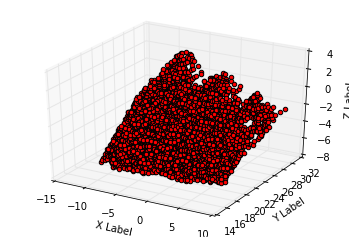

In [219]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

ax.set_xlim(-15,10)
ax.set_ylim(14,32)
ax.set_zlim(-8,4)

xs = points["x"]
ys = points["y"]
zs = points["z"]

ax.scatter(xs, ys, zs, c='r', marker='o', depthshade=False)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

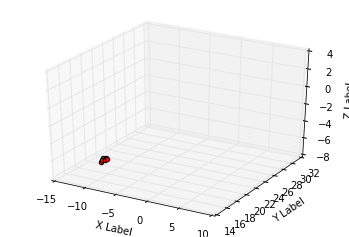

In [201]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

ax.set_xlim(-15,10)
ax.set_ylim(14,32)
ax.set_zlim(-8,4)

xs = points_quadrant_1_1["x"]
ys = points_quadrant_1_1["y"]
zs = points_quadrant_1_1["z"]
ax.scatter(xs, ys, zs, c='r', marker='o', depthshade=False)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

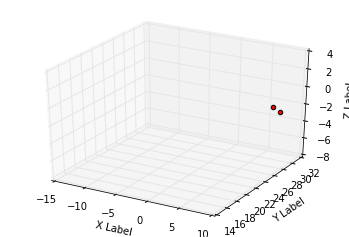

In [360]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

ax.set_xlim(-15,10)
ax.set_ylim(14,32)
ax.set_zlim(-8,4)

xs = points_quadrant_10_10["x"]
ys = points_quadrant_10_10["y"]
zs = points_quadrant_10_10["z"]
ax.scatter(xs, ys, zs, c='r', marker='o', depthshade=False)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [191]:
# calcula área do quadrante 1,1
total_area = 0
base_area = ((box_min.x+1*box_width_step) - (box_min.x+(1-1)*box_width_step)) * ((box_min.y+1*box_depth_step) - (box_min.y+(1-1)*box_depth_step))
total_area += (points_quadrant_1_1["z"].mean() - box_min.z) * base_area
total_area

0.83083723496194817

In [497]:
# calcula área total do modelo
model_xs = []
model_ys = []
model_zs = []

total_area = 0
total_volume = 0
for cur_step_width in range(1,STEPS_WIDTH+1):
    for cur_step_depth in range(1,STEPS_DEPTH+1):
        
        points_cur_quadrant = points.loc[(points["x"] > (box_min.x+(cur_step_width-1)*box_width_step)) & (points["y"] > (box_min.y+(cur_step_depth-1)*box_depth_step)) & (points["x"] <= (box_min.x+cur_step_width*box_width_step)) & (points["y"] <= (box_min.y+cur_step_depth*box_depth_step))]
            
        cur_width = ((box_min.x+cur_step_width*box_width_step) - (box_min.x+(cur_step_width-1)*box_width_step))
        cur_depth = ((box_min.y+cur_step_depth*box_depth_step) - (box_min.y+(cur_step_depth-1)*box_depth_step))
        
        # altura zero se não houverem pontos no quadrante
        if points_cur_quadrant.empty:
            cur_height = 0
        else:
            cur_height = (points_cur_quadrant["z"].mean() - box_min.z)
            
        # adiciona os pontos em listas para visualização posterior
        model_xs.append((box_min.x+cur_step_width*box_width_step))
        model_ys.append((box_min.y+cur_step_depth*box_depth_step))
        model_zs.append(cur_height)
        
        base_area = (cur_width * cur_depth)
        total_volume +=  base_area * cur_height
        
print total_volume

1121.31056505


In [193]:
# máximo volume possível de um quadrante
quadrant_max_volume = box_width_step * box_depth_step * delta.z
quadrant_max_volume

26.775341526287342

In [194]:
# máximo volume possível do modelo (soma do volume dos quadrantes)
model_max_volume = STEPS_WIDTH * STEPS_DEPTH * quadrant_max_volume
model_max_volume

2677.5341526287343

In [195]:
# porcentagem do todo preenchida pelo modelo
model_volume_filled_percentage = total_volume / model_max_volume * 100
model_volume_filled_percentage

42.590984313738083

In [196]:
# porcentagem do todo preenchida pela farinha (modelo físico)
model_real_filled_percentage = total_baseline_volume / max_model_volume * 100
model_real_filled_percentage

36.5015015015015

In [197]:
error_rate_percentage = model_volume_filled_percentage - model_real_filled_percentage
error_rate_percentage

6.0894828122365823

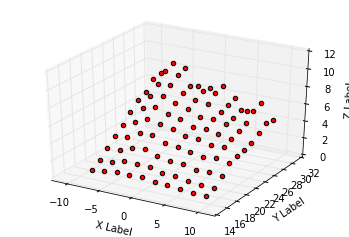

In [509]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

ax.set_xlim(-12,12)
ax.set_ylim(14,32)
ax.set_zlim(0,12)

xs = model_xs
ys = model_ys
zs = model_zs

ax.scatter(xs, ys, zs, c='r', marker='o', depthshade=False)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [501]:
# inverte a altura das boxes para a plotagem
model_zs_negative = []
for zs in model_zs:
    model_zs_negative.append(-zs)

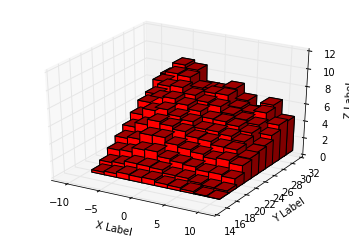

In [511]:
# plotagem das subdivisões da aproximação volumétrica
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100

ax.set_xlim(-12,12)
ax.set_ylim(14,32)
ax.set_zlim(0,12)

xs = model_xs
ys = model_ys
zs = model_zs

square_division_size = box_min.x+box_width_step
Axes3D.bar3d(ax, xs, ys, zs, square_size, square_size, model_zs_negative, color='r')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()